In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


F = pd.read_csv("ThoriumF_2025-04-30_15-53-53.csv")
F2 = pd.read_csv("ThoriumFF_2025-04-30_16-01-16_(1).csv")
F3 = pd.read_csv("ThoriumFFF_2025-04-30_16-04-48.csv")
Al = pd.read_csv("ThoriumAl_2025-04-30_15-12-39.csv")
Al2 = pd.read_csv("ThoriumAlAl_2025-04-30_15-15-50 (1).csv")
Al3 = pd.read_csv("ThoriumAlAlAl_2025-04-30_15-18-54.csv")
Cb = pd.read_csv("ThoriumCb_2025-04-30_15-30-50.csv")
Cb2 = pd.read_csv("ThoriumCbCb_2025-04-30_15-33-54.csv")
Cb3 = pd.read_csv("ThoriumCbCbCb_2025-04-30_15-41-25_(1).csv")
G = pd.read_csv("ThoriumG_2025-04-30_15-44-45.csv")
G2 = pd.read_csv("ThoriumGG_2025-04-30_15-47-36.csv")
G3 = pd.read_csv("ThoriumGGG_2025-04-30_15-50-17.csv")
Solo = pd.read_csv("ThoriumSolo_2025-04-30_15-09-25.csv")
T = pd.read_csv("ThoriumT_2025-04-30_15-22-01.csv")
TT = pd.read_csv("ThoriumTT_2025-04-30_15-24-41.csv")
TTT = pd.read_csv("ThoriumTTT_2025-04-30_15-27-27.csv")
Z = pd.read_csv("ThoriumZ_2025-04-30_16-08-54.csv")
ZZ = pd.read_csv("ThoriumZZ_2025-04-30_16-11-45.csv")
ZZZ = pd.read_csv("ThoriumZZZ_2025-04-30_16-14-22.csv")
Bgnd = pd.read_csv("background.csv")

In [12]:
def net_counts(df):
    return df['counts'] - Bgnd['counts'].mean()

materials = {
    "Felt": {
        "thickness": [4, 8, 12],
        "counts": [net_counts(F), net_counts(F2), net_counts(F3)]
    },
    "Aluminum": {
        "thickness": [6, 12, 18],
        "counts": [net_counts(Al), net_counts(Al2), net_counts(Al3)]
    },
    "Cardboard": {
        "thickness": [3, 6, 9],
        "counts": [net_counts(Cb), net_counts(Cb2), net_counts(Cb3)]
    },
    "Glass": {
        "thickness": [4, 8, 12],
        "counts": [net_counts(G), net_counts(G2), net_counts(G3)]
    },
    "Tungsten": {
        "thickness": [10, 20, 30],  # Converted from cm to mm
        "counts": [net_counts(T), net_counts(TT), net_counts(TTT)]
    },
    "Zinc": {
        "thickness": [0.6858, 1.3716, 2.0574],
        "counts": [net_counts(Z), net_counts(ZZ), net_counts(ZZZ)]
    }
}

Felt: a = 234.80, b = 0.00
Aluminum: a = 220.22, b = 0.01
Cardboard: a = 234.73, b = 0.01
Glass: a = 211.79, b = 0.00
Tungsten: a = 161.70, b = 0.08
Zinc: a = 242.39, b = 0.04


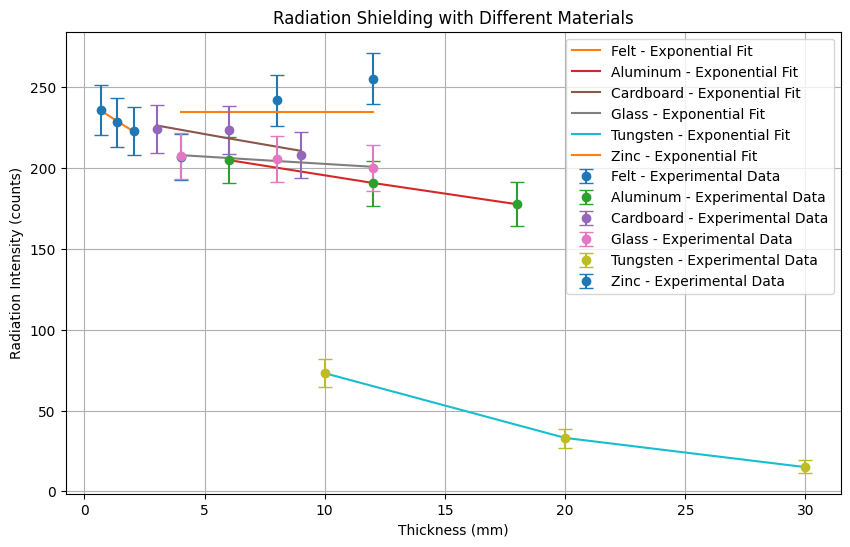

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def calculate_uncertainty(counts):
    return np.sqrt(counts)

def exponential_decay(x, a, b):
    return a * np.exp(-b * np.array(x))


# Defining the 'materials' dictionary here before using it
materials = {
    "Felt": {
        "thickness": [4, 8, 12],
        "counts": [net_counts(F), net_counts(F2), net_counts(F3)]
    },
    "Aluminum": {
        "thickness": [6, 12, 18],
        "counts": [net_counts(Al), net_counts(Al2), net_counts(Al3)]
    },
    "Cardboard": {
        "thickness": [3, 6, 9],
        "counts": [net_counts(Cb), net_counts(Cb2), net_counts(Cb3)]
    },
    "Glass": {
        "thickness": [4, 8, 12],
        "counts": [net_counts(G), net_counts(G2), net_counts(G3)]
    },
    "Tungsten": {
        "thickness": [10, 20, 30],  # Converted from cm to mm
        "counts": [net_counts(T), net_counts(TT), net_counts(TTT)]
    },
    "Zinc": {
        "thickness": [0.6858, 1.3716, 2.0574],
        "counts": [net_counts(Z), net_counts(ZZ), net_counts(ZZZ)]
    }
}

plt.figure(figsize=(10, 6))

for material, data in materials.items():
    thickness = data["thickness"]
    intensity = [counts.mean() for counts in data["counts"]]
    uncertainty = [calculate_uncertainty(counts).mean() for counts in data["counts"]]

    params, covariance = curve_fit(
        exponential_decay,
        thickness,
        intensity,
        bounds=([0, 0], [np.inf, np.inf])
    )

    # Assigning the fitted parameters to a and b
    a, b = params

    plt.errorbar(thickness, intensity, yerr=uncertainty, fmt="o", label=f"{material} - Experimental Data", capsize=5)
    plt.plot(thickness, exponential_decay(thickness, a, b), "-", label=f"{material} - Exponential Fit")

    print(f"{material}: a = {a:.2f}, b = {b:.2f}")

plt.xlabel("Thickness (mm)")
plt.ylabel("Radiation Intensity (counts)")
plt.title("Radiation Shielding with Different Materials")
plt.legend()
plt.grid(True)
plt.show()